### Reading the data 

First we have to read our car sales data from the CSV file into a Pandas dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# This line requires the car sales data to be located in a folder called data in the same directory as the notebook
car_data = pd.read_csv("./data/car_sales.csv", low_memory=False)

Now, let's take a first look at how our data looks like.

In [2]:
car_data.head()

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num
0,Bentley,Arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000,6.8L,Automatic,Petrol,21500,5.0,4.0
1,Bentley,Arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,6.8L,Automatic,Petrol,28750,5.0,4.0
2,Bentley,Arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,6.8L,Automatic,Petrol,29999,5.0,4.0
3,Bentley,Arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000,6.8L,Automatic,Petrol,34948,5.0,4.0
4,Bentley,Arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652,6.8L,Automatic,Petrol,26555,5.0,4.0


### Initial cleanup and analysis of the data

For covenience, we will set all of the column names to lowercase.

In [3]:
car_data.columns = car_data.columns.str.lower()

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   maker         268255 non-null  object 
 1   genmodel      268255 non-null  object 
 2   genmodel_id   268255 non-null  object 
 3   adv_id        268255 non-null  object 
 4   adv_year      268255 non-null  int64  
 5   adv_month     268255 non-null  int64  
 6   color         246380 non-null  object 
 7   reg_year      268248 non-null  float64
 8   bodytype      267301 non-null  object 
 9   runned_miles  267200 non-null  object 
 10  engin_size    266191 non-null  object 
 11  gearbox       268088 non-null  object 
 12  fuel_type     267846 non-null  object 
 13  price         268255 non-null  object 
 14  seat_num      261781 non-null  float64
 15  door_num      263702 non-null  float64
dtypes: float64(3), int64(2), object(11)
memory usage: 32.7+ MB


In [5]:
car_data.shape

(268255, 16)

From the above we can see that our dataset consists of 16 columns and 268255 rows. Furthermore, we can see that we have 11 attributes of type *object*, 3 attributes of type *float64*, and 2 attributes of type *int64*. Straightaway we can drop columns **genmodel_id**, **adv_id**.

In [6]:
car_data = car_data.drop(columns=["genmodel_id", "adv_id"])

In a few cases, it seems that there has been a conversion issue while reading from the CSV file, as attributes such as **price** and **runned_miles** should be of numerical type instead of type *object*. Also, the *engine_size* attribute should be of numerical type, however in this case the automatic conversion to *object* type is due to the letter "L" appending the engine size in liters. We will fix these issues now. <br><br>

First let's remove the appending "L" from the **engin_size** column and convert it to a float.

In [7]:
car_data["engin_size"] = car_data["engin_size"].str.rstrip('L').astype(float)

Now let's take care of the two other issues. After taking a closer look at the values in the **price** column, we can see that there are entries with value of "Uknown". This is the reason why the automatic conversion did not work. We will fix it now.

In [8]:
car_data["price"] = pd.to_numeric(car_data["price"], errors='coerce')

The **runned_miles** column seems to have empty entries, hence to fix it we will repeat the same procedure as above:

In [9]:
car_data["runned_miles"] = pd.to_numeric(car_data["runned_miles"], errors='coerce')

Let's now examine the summary of our dataset again.

In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   maker         268255 non-null  object 
 1   genmodel      268255 non-null  object 
 2   adv_year      268255 non-null  int64  
 3   adv_month     268255 non-null  int64  
 4   color         246380 non-null  object 
 5   reg_year      268248 non-null  float64
 6   bodytype      267301 non-null  object 
 7   runned_miles  266942 non-null  float64
 8   engin_size    266191 non-null  float64
 9   gearbox       268088 non-null  object 
 10  fuel_type     267846 non-null  object 
 11  price         267110 non-null  float64
 12  seat_num      261781 non-null  float64
 13  door_num      263702 non-null  float64
dtypes: float64(6), int64(2), object(6)
memory usage: 28.7+ MB


Now all the attributes that are numerical have a numerical data type. <br><br>

As a next step, let's examine the null values in each column.

In [11]:
car_data.isnull().sum()

maker               0
genmodel            0
adv_year            0
adv_month           0
color           21875
reg_year            7
bodytype          954
runned_miles     1313
engin_size       2064
gearbox           167
fuel_type         409
price            1145
seat_num         6474
door_num         4553
dtype: int64

We can see that a majority of attributes has missing values. We will have to take care of it later. <br><br>

Last but not least let's examine a summary of the numerical attributes.

In [12]:
car_data.describe()

,adv_year,adv_month,reg_year,runned_miles,engin_size,price,seat_num,door_num
count,268255.000000,268255.000000,268248.000000,2.669420e+05,266191.000000,2.671100e+05,261781.000000,263702.000000
mean,2018.127778,5.626143,2012.708430,4.816993e+04,1.963554,1.475626e+04,4.904306,4.371594
std,0.747476,2.091577,4.465705,4.184823e+04,9.362173,3.232091e+04,0.877934,1.009339
min,2012.000000,1.000000,1900.000000,0.000000e+00,0.100000,1.000000e+02,1.000000,0.000000
25%,2018.000000,4.000000,2010.000000,1.416000e+04,1.400000,4.990000e+03,5.000000,4.000000
50%,2018.000000,5.000000,2014.000000,3.929650e+04,1.800000,9.299000e+03,5.000000,5.000000
75%,2018.000000,7.000000,2016.000000,7.500000e+04,2.000000,1.715000e+04,5.000000,5.000000
max,2021.000000,33.000000,2019.000000,6.363342e+06,3500.000000,9.999999e+06,17.000000,7.000000


### Removing the outliers
Now let's do some visualisations of our dataset to gain more insights into our data. We are going to start with a boxplot for all numerical attributes of our dataset.

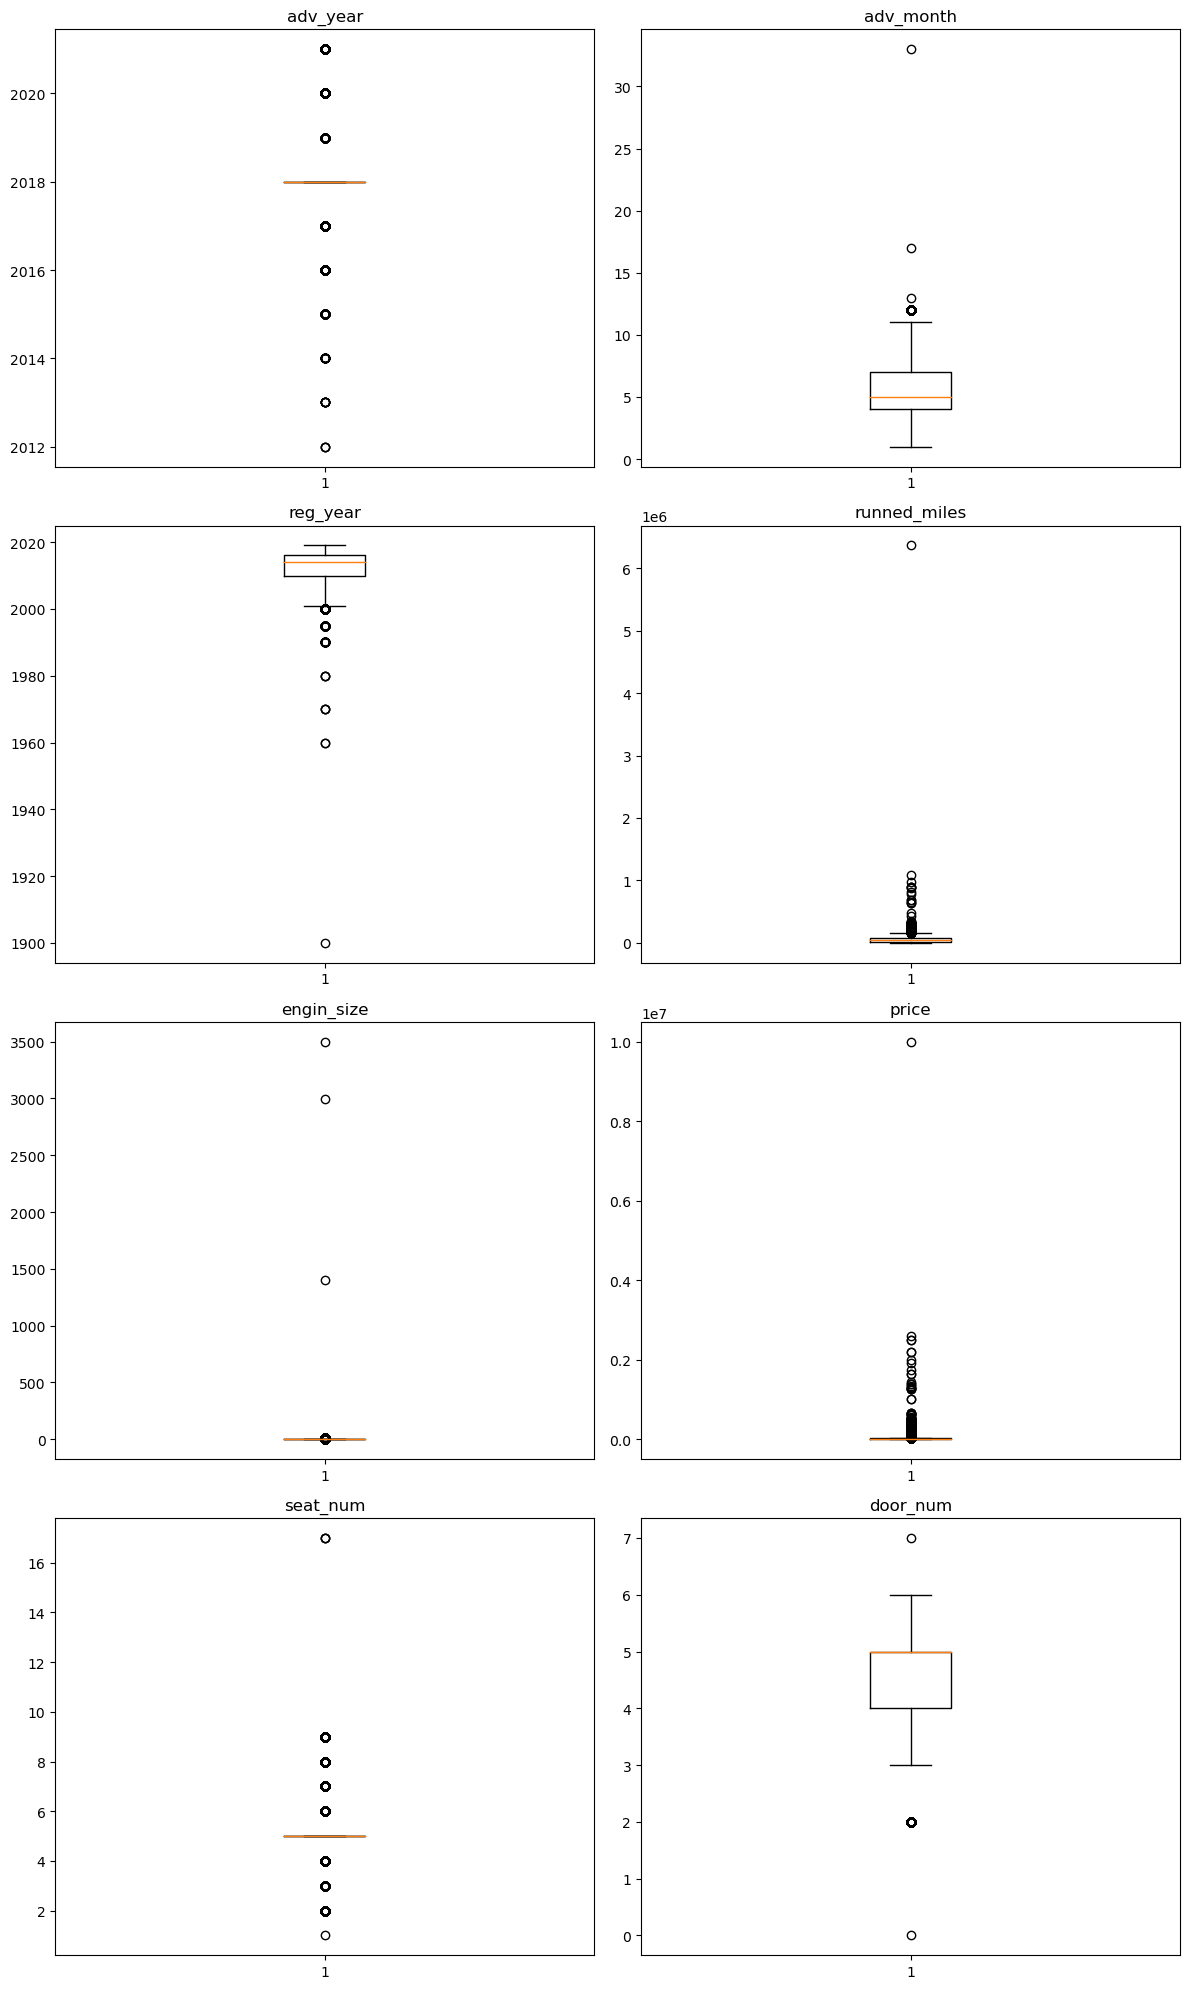

In [13]:
numerical_columns = car_data.select_dtypes(include=['float64', 'int64'])

num_columns = len(numerical_columns.columns)
num_rows = (num_columns // 2) + (num_columns % 2)

plt.figure(figsize=(12, 5 * num_rows))

for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, 2, i)
    plt.boxplot(car_data[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()

Looking at the figures above, we can already see that we have some odd-looking outliers in **adv_month**, **price**, **engine_size**, and **seat_num**. As for the first three attributes they are definietly outliers as the numbers just don't make sense, the last one actually does not have any outliers. It turns out that the 17 seats belong to the Mercedes Sprinter Minibus so we are good with this one. However, we have to take care of the other outliers.

Let's start with **adv_month**. We will check how many values exceeding 12 do we actually have.

In [14]:
car_data[car_data["adv_month"] > 12]

,maker,genmodel,adv_year,adv_month,color,reg_year,bodytype,runned_miles,engin_size,gearbox,fuel_type,price,seat_num,door_num
46560,Ford,Streetka,2012,13,Blue,2005.0,Convertible,22000.0,1.6,Manual,Petrol,2999.0,2.0,2.0
135473,Peugeot,407,2012,17,Blue,2006.0,Coupe,77000.0,2.7,Automatic,Diesel,4499.0,4.0,2.0
154764,Rolls-Royce,Phantom,2012,33,Black,2007.0,Saloon,20000.0,6.7,Automatic,Petrol,116065.0,5.0,NaN


For this one it seems reasonable to fill the corrupted **adv_month** values with the most frequent value for that column.

In [15]:
most_frequent_value = car_data["adv_month"].mode().iloc[0]
car_data["adv_month"] = car_data["adv_month"].map(lambda x: most_frequent_value if x > 12 else x)

Now let's take care of the **price** column.

In [16]:
car_data.nlargest(10, "price")

,maker,genmodel,adv_year,adv_month,color,reg_year,bodytype,runned_miles,engin_size,gearbox,fuel_type,price,seat_num,door_num
104958,McLaren,675LT,2017,6,Silver,2016.0,Coupe,200.0,3.8,Automatic,Petrol,9999999.0,2.0,2.0
14460,Ferrari,Laferrari,2018,3,Red,2014.0,Coupe,1824.0,6.3,NaN,NaN,2599990.0,2.0,NaN
14462,Ferrari,Laferrari,2018,4,Red,2014.0,Coupe,1502.0,NaN,NaN,Petrol,2500000.0,2.0,NaN
105002,McLaren,P1,2021,4,Yellow,2019.0,Coupe,600.0,3.8,Automatic,Petrol Plug-in Hybrid,2490000.0,2.0,2.0
14276,Ferrari,Enzo,2018,3,Red,2004.0,Coupe,7620.0,6.0,NaN,Petrol,2200000.0,2.0,NaN
14461,Ferrari,Laferrari,2017,10,Red,2013.0,Coupe,5800.0,6.3,Automatic,NaN,2195000.0,2.0,NaN
14275,Ferrari,Enzo,2017,10,Red,2003.0,Coupe,4397.0,6.0,NaN,Petrol,2000000.0,2.0,NaN
104999,McLaren,P1,2017,2,Yellow,2016.0,Coupe,151.0,3.8,Automatic,Hybrid Petrol/Electric Plug-in,1920000.0,2.0,2.0
105000,McLaren,P1,2018,4,Orange,2016.0,Coupe,NaN,3.8,Automatic,Petrol,1750000.0,NaN,NaN
1109,Bugatti,Veyron,2018,5,Black,2007.0,Coupe,828.0,8.0,Automatic,Petrol,1650000.0,2.0,NaN


It is highly unlikely that a McLaren 675LT would cost almost 10000000 pounds. Let's see if we have any other McLarens 675LT soldi in 2017 in our dataset.

In [17]:
car_data[(car_data["genmodel"] == "675LT") & (car_data["adv_year"] == 2017)]

,maker,genmodel,adv_year,adv_month,color,reg_year,bodytype,runned_miles,engin_size,gearbox,fuel_type,price,seat_num,door_num
104946,McLaren,675LT,2017,6,Orange,2016.0,Convertible,193.0,3.8,Automatic,Petrol,299990.0,2.0,2.0
104947,McLaren,675LT,2017,10,Orange,2016.0,Coupe,662.0,3.8,Automatic,Petrol,244950.0,2.0,2.0
104950,McLaren,675LT,2017,9,Orange,2016.0,Coupe,9843.0,3.8,Automatic,Petrol,249000.0,2.0,NaN
104958,McLaren,675LT,2017,6,Silver,2016.0,Coupe,200.0,3.8,Automatic,Petrol,9999999.0,2.0,2.0
104960,McLaren,675LT,2017,7,Grey,2016.0,Convertible,280.0,3.8,Semi-Automatic,Petrol,299950.0,NaN,NaN
104962,McLaren,675LT,2017,9,Green,2016.0,Convertible,10.0,3.8,Automatic,Petrol,309995.0,2.0,NaN
104967,McLaren,675LT,2017,4,White,2015.0,Coupe,30000.0,3.8,Automatic,Petrol,269989.0,2.0,2.0


Since we have a bunch of them, let's fill in our outlier with the median for the 675LTs sold in 2017.

In [18]:
mclaren_price_median = car_data[(car_data["genmodel"] == "675LT") & (car_data["adv_year"] == 2017) & (car_data["price"] < 1000000)]["price"].median()
car_data.at[104958, "price"] = mclaren_price_median

Next we have the **engin_size** column.

In [19]:
car_data.nlargest(10, "engin_size")

,maker,genmodel,adv_year,adv_month,color,reg_year,bodytype,runned_miles,engin_size,gearbox,fuel_type,price,seat_num,door_num
130799,Nissan,Elgrand,2018,7,Black,2004.0,MPV,52000.0,3500.0,Automatic,Petrol,9988.0,8.0,NaN
114114,Mitsubishi,Gto,2018,5,Red,2002.0,Coupe,61000.0,2998.0,Automatic,Petrol,2995.0,4.0,NaN
130712,Nissan,Cubic,2018,5,NaN,2003.0,Estate,71000.0,1400.0,Automatic,Petrol,3000.0,5.0,NaN
194214,Suzuki,Celerio,2018,3,White,2017.0,Hatchback,22058.0,10.0,Manual,Petrol,5499.0,NaN,NaN
146118,Porsche,Cayenne,2018,3,Black,2018.0,Estate,50.0,8.2,NaN,Diesel,64990.0,NaN,NaN
1108,Bugatti,Veyron,2018,4,Multicolour,2007.0,Coupe,5000.0,8.0,Automatic,Petrol,1250000.0,NaN,NaN
1109,Bugatti,Veyron,2018,5,Black,2007.0,Coupe,828.0,8.0,Automatic,Petrol,1650000.0,2.0,NaN
1795,Chevrolet,Corvette,2018,4,Orange,2015.0,Coupe,6600.0,7.0,Manual,Petrol,99995.0,2.0,NaN
78972,Lamborghini,Aventador,2017,12,Orange,2012.0,NaN,18000.0,6.9,Automatic,Petrol,202895.0,2.0,NaN
0,Bentley,Arnage,2018,4,Silver,2000.0,Saloon,60000.0,6.8,Automatic,Petrol,21500.0,5.0,4.0


Looking at the largest values, we can safely assume that there was a mistake made in the units of the engine size values. For the Nissan Elgrand model the value should be 3.5 liters, for Mitsubishi GTO it should be 2.998 liters, for Nissan Cubic it should be 1.4 liters, and for Suzuki Celerio it should be 1.0 liters.

In [20]:
car_data.at[130799, "engin_size"] = 3.5
car_data.at[114114, "engin_size"] = 2.998
car_data.at[130712, "engin_size"] = 1.4
car_data.at[194214, "engin_size"] = 1

Last but not least, we have the **runned_miles** column. Let's take a look at the top 10 largest values.

In [21]:
car_data.nlargest(10, "runned_miles")

,maker,genmodel,adv_year,adv_month,color,reg_year,bodytype,runned_miles,engin_size,gearbox,fuel_type,price,seat_num,door_num
245206,Volkswagen,Golf,2018,4,Black,2007.0,Hatchback,6363342.0,1.6,Manual,Petrol,2395.0,5.0,5.0
57788,Hyundai,Getz,2018,6,Silver,2005.0,Hatchback,1080000.0,1.1,Manual,Petrol,785.0,5.0,3.0
94682,MINI,Convertible,2018,5,Red,2004.0,Convertible,967515.0,1.6,Manual,Petrol,1875.0,4.0,2.0
27899,Ford,Focus,2017,11,NaN,2010.0,Hatchback,900000.0,1.6,Manual,Petrol,1500.0,5.0,5.0
66895,Jaguar,XF,2018,4,Black,2010.0,Saloon,900000.0,3.0,Automatic,Diesel,9100.0,5.0,4.0
230562,Vauxhall,Zafira,2018,8,Beige,2007.0,MPV,889087.0,1.6,Manual,Petrol,500.0,7.0,5.0
15545,Fiat,Grande Punto,2018,5,Black,2006.0,Hatchback,880000.0,1.4,Manual,Petrol,800.0,5.0,3.0
1210,Chevrolet,Lacetti,2018,8,Blue,2008.0,Estate,820000.0,1.8,Automatic,Petrol,325.0,5.0,5.0
7701,Citroen,C2,2018,8,Blue,2004.0,Hatchback,780000.0,1.1,Manual,Petrol,250.0,4.0,3.0
231222,Vauxhall,Zafira,2018,8,Silver,2004.0,MPV,690644.0,2.0,Manual,Diesel,850.0,7.0,5.0


There is no way that the Volkswagen Golf has driven more than 6 million miles in 11 years. Let's take a look at similar models.

In [22]:
len(car_data[(car_data["genmodel"] == "Golf") & (car_data["adv_year"] == 2018)])

2852

We have 2852 models of Volkswagen Golf that have been advertised in 2018. Now, let's get the cars that had a similar price and registration year.

In [23]:
similar_cars = car_data[(car_data["genmodel"] == "Golf") & (car_data["adv_year"] == 2018) & (car_data["price"] > 2300) & (car_data["price"] < 2500) & (car_data["reg_year"] == 2007) & (car_data["door_num"] == 5)]
similar_cars = similar_cars.drop(245206)

Now let's replace the value with the median mileage for this set of cars similar to the Volkswagen Golf under consideration.

In [24]:
car_data.at[245206, "runned_miles"] = similar_cars["runned_miles"].median()

### Visualising the data

Now as we have removed the outliers, we can make use of different visualization techniques to gain more insights about our data. 

First visualisation we can make use of is the scatter matrix, where we will be able to see if there are any promising correlations between the attributes. We will plot only a few of the attributes since plotting all of them would take up way too much space. <br><br>

Before we plot let's first examine the correlation coefficients of different numerical attributes with the price.

In [25]:
corr_matrix = car_data.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price           1.000000
engin_size      0.479720
reg_year        0.290790
adv_year        0.077953
adv_month      -0.032308
seat_num       -0.139872
door_num       -0.141074
runned_miles   -0.302265
Name: price, dtype: float64

It seems like the attributes that are the most correlated with the price are **engin_size**, **reg_year**, **seat_num**, **door_num**, and **runned_miles**.

Now, we can also try to combine **seat_num** and **door_num** because from a logical point of view, we can quite accurately determine the number of doors given the number of seats in a car an vice versa because of the standards in the industry.

In [26]:
car_data["sum_seats_and_doors"] = car_data["seat_num"] + car_data["door_num"]
corr_matrix = car_data.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                  1.000000
engin_size             0.479720
reg_year               0.290790
adv_year               0.077953
adv_month             -0.032308
seat_num              -0.139872
door_num              -0.141074
sum_seats_and_doors   -0.155768
runned_miles          -0.302265
Name: price, dtype: float64

As we can see, the sum of seats and doors seems to have a stronger correlation with the price compared to seat number and door number attributes on their own. Hence, let's remove both **seat_num** and **door_num** and use **sum_seats_and_doors** instead.

In [27]:
car_data = car_data.drop(["seat_num", "door_num"], axis=1)

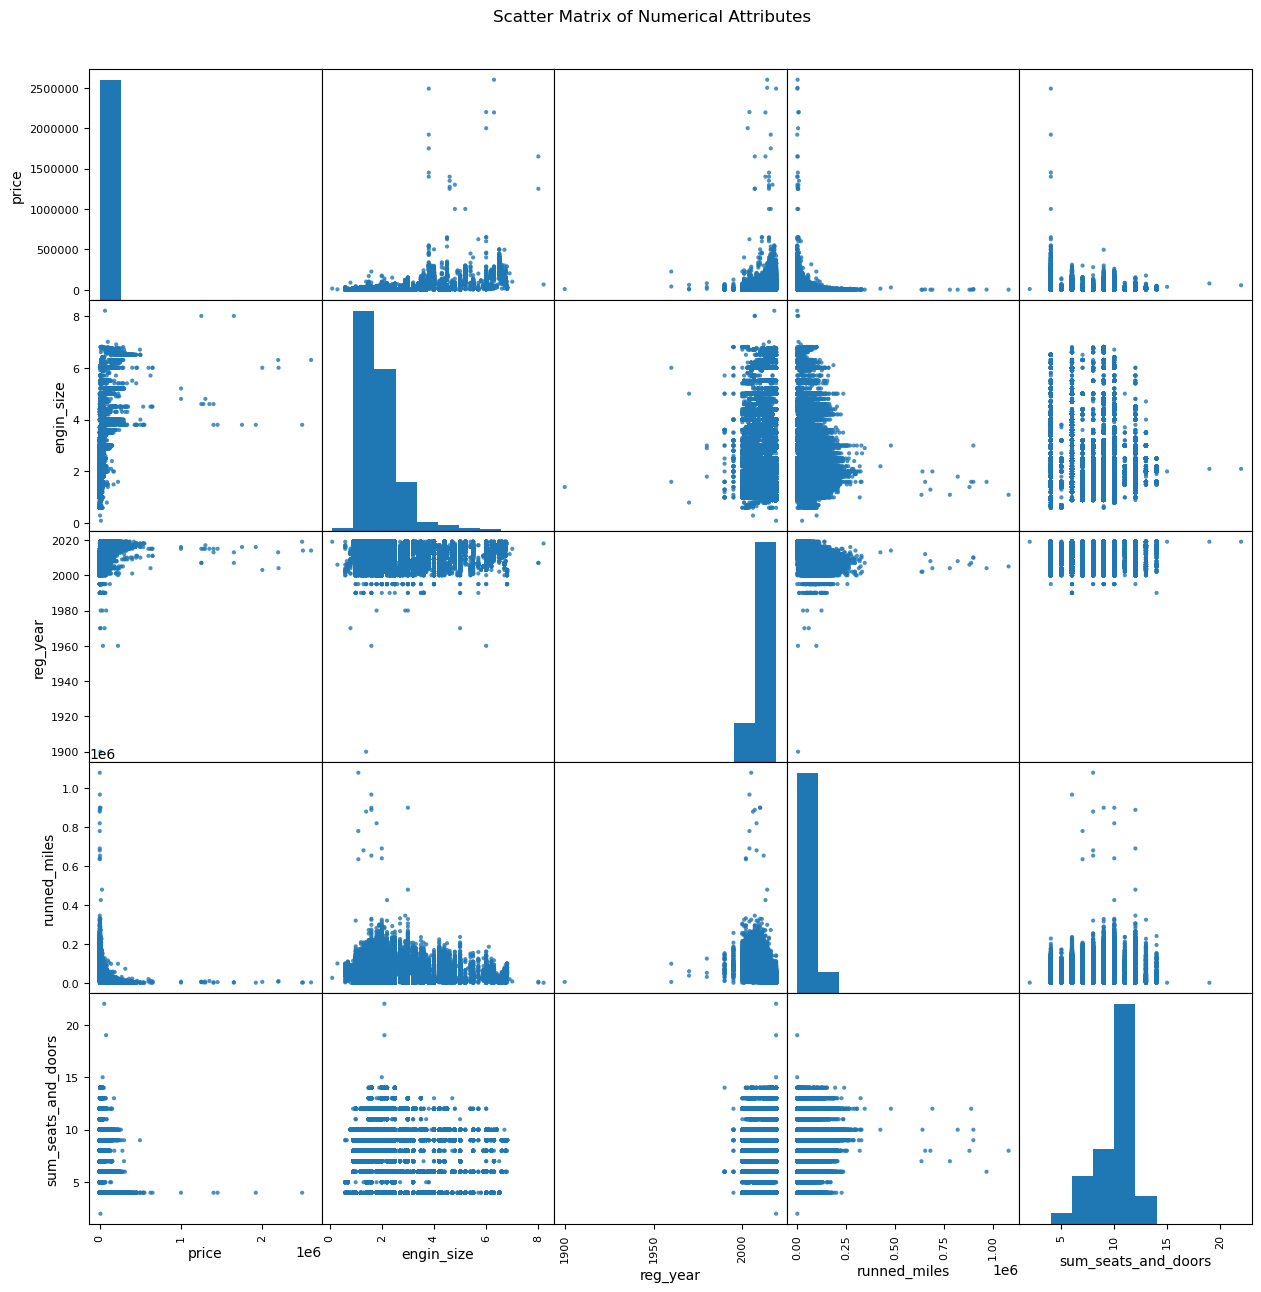

In [28]:
from pandas.plotting import scatter_matrix
attributes = ["price", "engin_size", "reg_year","runned_miles", "sum_seats_and_doors"]
scatter_matrix(car_data[attributes], alpha=0.8, figsize=(15, 15), diagonal='hist', range_padding=0.1)
plt.suptitle('Scatter Matrix of Numerical Attributes', y=0.92)
plt.show()

From the above, we can deduce that there is a strong positive correlation between price and engine size, which makes a lot of sense as generally cars with bigger engines are more expensive. Also there seems to be a more positive correlation between price and registration year, which is also valid as newer cars are more expensive. When it comes to negative correlations, we can see a that as the mileage increases, the price rapidly drops, which is expected since the more worn out cars will obviously be cheaper.

### Replacing null values

Now we are going to take care of the values that are empty. A good strategy for this problem would be looking at models that are very similar to our considered model and replacing the missing value with the median value of the missing attribute for the set of similar entries. A utility in sklearn that does that is called KNNImputer. <br><br>

However, before we can use it we have to make sure that all the attributes are numerical.<br><br>

First, let's see what variety of categories we have in each nominal attribute.

In [43]:
print(car_data["maker"].value_counts())

Ford          26937
Audi          22521
Vauxhall      20158
Volkswagen    17999
BMW           17194
              ...  
Brooke            1
MEV               1
Grinnall          1
Koenigsegg        1
Pilgrim           1
Name: maker, Length: 88, dtype: int64


In [44]:
print(car_data["genmodel"].value_counts())

Corsa             5569
Focus             5179
Fiesta            4761
Juke              3427
X5                3372
                  ... 
GS 430               1
Fairlady             1
GS Unspecified       1
Wish                 1
AMG                  1
Name: genmodel, Length: 896, dtype: int64


In [45]:
print(car_data["color"].value_counts())

Black          48751
Silver         40214
Blue           38376
Grey           37678
White          34270
Red            25987
Green           5027
Yellow          3072
Brown           2878
Orange          2829
Beige           1982
Purple          1361
Gold            1223
Bronze          1200
Multicolour      800
Pink             299
Maroon           179
Turquoise        176
Burgundy          48
Magenta           18
Navy               8
Indigo             4
Name: color, dtype: int64


In [46]:
print(car_data["bodytype"].value_counts())

Hatchback          103768
SUV                 64396
Saloon              22583
MPV                 22507
Coupe               17082
Estate              16797
Convertible         13206
Pickup               5268
Combi Van             657
Panel Van             477
Minibus               229
Car Derived Van       119
Limousine              93
Window Van             88
Camper                 24
Manual                  5
Tipper                  1
Chassis Cab             1
Name: bodytype, dtype: int64


In [47]:
print(car_data["gearbox"].value_counts())

Manual            170832
Automatic          97119
Semi-Automatic       137
Name: gearbox, dtype: int64


In [42]:
print(car_data["fuel_type"].value_counts())

Diesel                             132793
Petrol                             127379
Hybrid  Petrol/Electric              4492
Electric                             1302
Hybrid  Petrol/Electric Plug-in      1007
Petrol Hybrid                         385
Petrol Plug-in Hybrid                 258
Hybrid  Diesel/Electric               108
Diesel Hybrid                          47
Hybrid  Diesel/Electric Plug-in        37
Bi Fuel                                28
Petrol Ethanol                          8
Diesel Plug-in Hybrid                   2
Name: fuel_type, dtype: int64


As we can see above

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_maker = LabelEncoder()
label_encoder_model
label_encoder_color


In [31]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)

knn_imputer.fit_transform(car_data)

ValueError: could not convert string to float: 'Bentley'

### Extracting the test set